<a href="https://colab.research.google.com/github/gohilunnati/CNSpracs/blob/main/ResNet50_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch


In [4]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
root = 'data',
train = True,
transform = ToTensor(),
download = True,
)
test_data = datasets.MNIST(
root = 'data',
train = False,
transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 33497220.16it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1362958.85it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8142368.17it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3390377.07it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [7]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [8]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [9]:
print(train_data.targets.size())

torch.Size([60000])


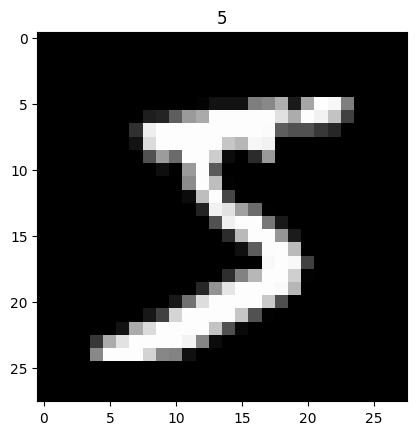

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

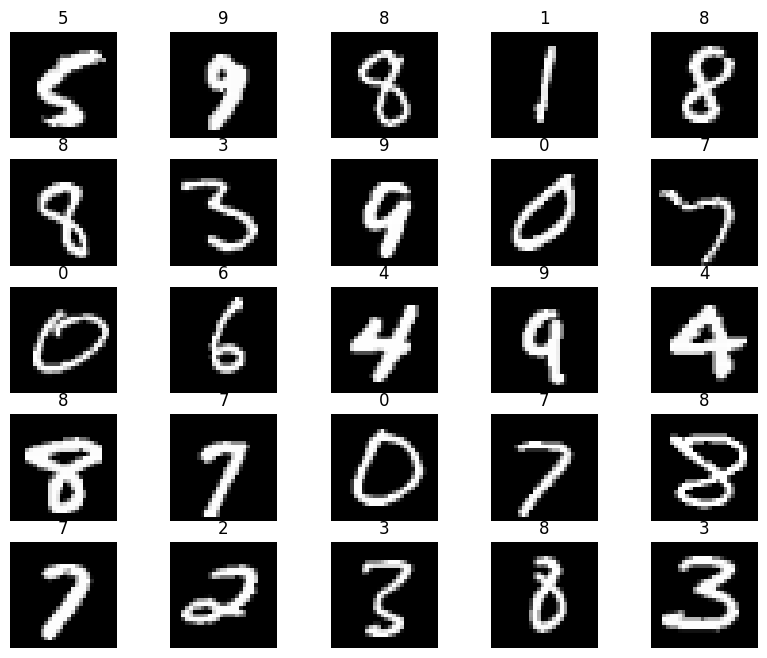

In [11]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()



In [12]:
from torch.utils.data import DataLoader
loaders = {
   'train' : torch.utils.data.DataLoader(train_data,
               batch_size=100,
               shuffle=True,
               num_workers=1),
'test' : torch.utils.data.DataLoader(test_data,
                   batch_size=100,
                   shuffle=True,
                   num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x78021d93a0e0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x78021d939db0>}

In [13]:
from torchvision import models
import torch.nn as nn

In [14]:
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 86.3MB/s]


In [15]:
from torchvision.transforms import Compose, Resize, ToTensor, Grayscale

transform = Compose([
    Resize((224, 224)),  # Resize images to 224x224
    Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels
    ToTensor(),  # Convert to tensor
])


In [16]:
train_data = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False, num_workers=2)


In [18]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms




In [19]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [20]:
# Load ResNet50 model
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)  # Adjusting the final layer for MNIST
model = model.to(device)





In [21]:
# Loss and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [53]:



# Training the model
num_epochs = 10  # Number of epochs
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)


In [54]:
 # Forward pass
outputs = model(images)
loss = loss_func(outputs, labels)


In [55]:

        # Backward and optimizez
optimizer.zero_grad()
loss.backward()
optimizer.step()

print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/10], Loss: 1.1007


In [59]:
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [60]:
correct = 0
total = 0

# Disable gradient calculation for inference
with torch.no_grad():
    # Get a batch of images from the test loader
    images, labels = next(iter(test_loader))

    # Move images and labels to the appropriate device (GPU or CPU)
    images, labels = images.to(device), labels.to(device)

    # Get model predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability

    # Convert to CPU for visualization (if necessary)
    images = images.cpu()
    predicted = predicted.cpu()
    labels = labels.cpu()

    # Calculate the number of correct predictions
    correct += (predicted == labels).sum().item()
    total += labels.size(0)

    # Calculate and print accuracy
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')


Test Accuracy: 45.00%


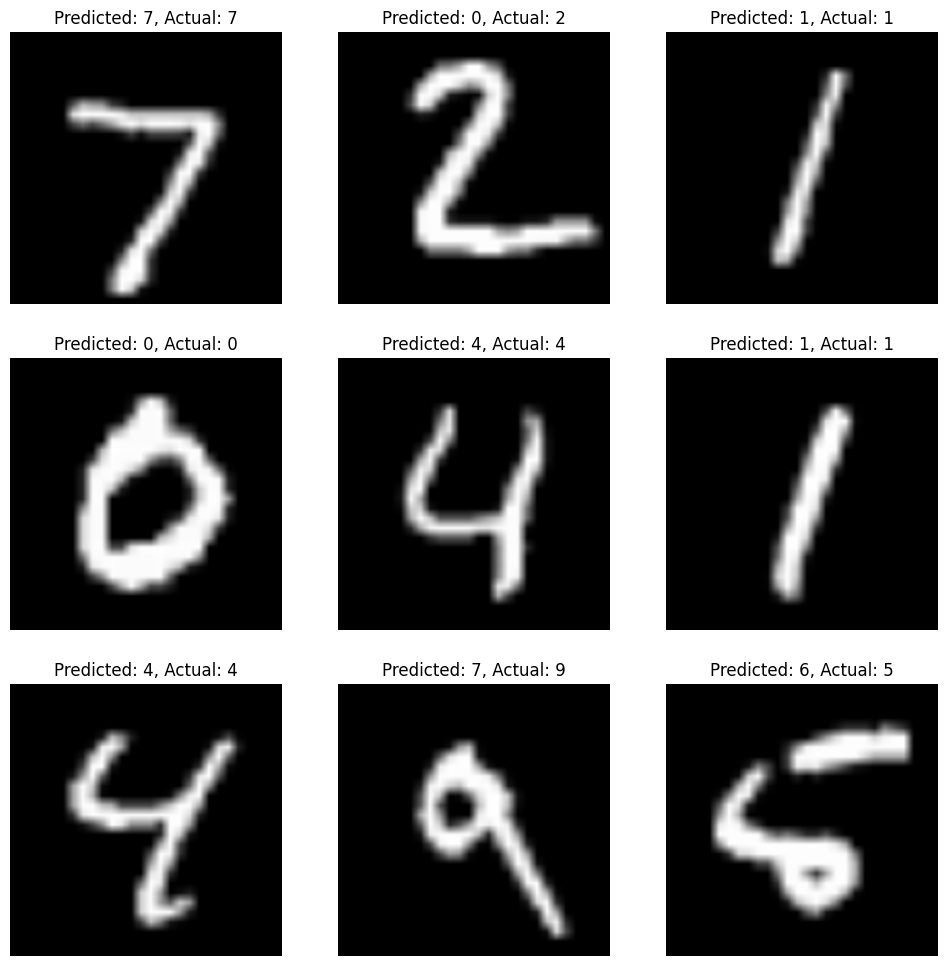

In [58]:
fig = plt.figure(figsize=(12, 12))
for i in range(9):  # Show the first 9 images
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(images[i].permute(1, 2, 0).squeeze(), cmap='gray')  # Remove channel dimension for grayscale
    ax.set_title(f"Predicted: {predicted[i].item()}, Actual: {labels[i].item()}")
    ax.axis('off')  # Hide axes

plt.show()